In [1]:
import pandas as pd

In [3]:
# 파일 읽어오기
url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
titanic = pd.read_csv(url)
# 외부 데이터를 가져오면 데이터 분석이 가장 중요
titanic

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [12]:
# 데이터 파악 : 결측치, 행, 열 파악
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [37]:
# 전처리
# 결측치 여부 확인
# titanic.isnull().value_counts()
titanic.isnull().sum()

# 컬럼명 변경 : Sex -> Gender
titanic.rename(columns={'Sex' : 'Gender'}, inplace=True)

In [ ]:
# 분석 -> 변수 사이의 관계로 가설을 세워 무엇을 분석할 것인지 정함
# 1. 성별 전체의 생존, 사망 총 인원 수
surviver = titanic.groupby(['Survived', 'Gender'])
total_female = titanic[titanic.Gender=='female'].count()[0]
total_male = len(titanic.index) - total_female
# print(surviver.size())

In [107]:
# # 성별 전체의 생존, 사망 비율
# # 방법 1
# print(f'여성 사망자 비율 : {surviver.size()[0]["female"]/total_female*100}')
# print(f'여성 생존자 비율 : {surviver.size()[1]["female"]/total_female*100}')
# print(f'남성 사망자 비율 : {surviver.size()[0]["male"]/total_male*100}')
# print(f'남성 생존자 비율 : {surviver.size()[1]["male"]/total_male*100}')
# # 사망자의 비율이 남자가 더 높음

여성 사망자 비율 : 25.796178343949045
여성 생존자 비율 : 74.20382165605095
남성 사망자 비율 : 80.97731239092496
남성 생존자 비율 : 19.022687609075042


In [175]:
# 방법 2. 구하기 쉬운 형태로 구한 후 행 위치 변경
g_s = titanic.groupby('Gender').Survived.value_counts(normalize=True).sort_index() * 100

AttributeError: 'Series' object has no attribute 'stack'

In [154]:
g_s.unstack()

Survived,0,1
Gender,,
female,25.796178,74.203822
male,80.977312,19.022688


In [153]:
# unstack할 행 지정 가능
g_s.unstack('Gender')

Gender,female,male
Survived,,
0,25.796178,80.977312
1,74.203822,19.022688


In [155]:
# 멀티인덱스도 내부적으로 인덱스를 사용해 인덱스로 지정가능
g_s.unstack(0)

Gender,female,male
Survived,,
0,25.796178,80.977312
1,74.203822,19.022688


In [184]:
# 행을 언스택한 후 다시 스택형태로 만듦
g_s.unstack(0).stack()

Survived  Gender
0         female    25.796178
          male      80.977312
1         female    74.203822
          male      19.022688
dtype: float64

In [159]:
# 행 위치 변경
g_s.swaplevel().sort_index()

Survived  Gender
0         female    25.796178
          male      80.977312
1         female    74.203822
          male      19.022688
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x2756f35d700>,
 [Text(1.0109235839261344, 0.4336283056512114, '0female'),
  Text(-0.5385332844261318, 0.9591568701548268, '0male'),
  Text(-0.21034758138238147, -1.079700835883062, '1female'),
  Text(1.0512569176717717, -0.3238192289646283, '1male')])

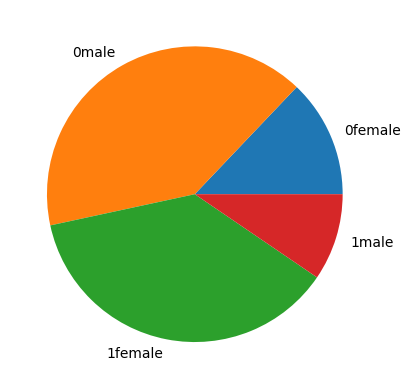

In [162]:
import matplotlib.pyplot as plt
plt.pie(g_s.swaplevel().sort_index(),labels=['0female', '0male', '1female', '1male'])

In [161]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, hatch=None, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : 1D array-like
        The wedge sizes.
    
    explode : array-like, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : list, default: None
        A sequence of strings providing the labels for each wedge
    
    colors : array-like, default: None
        A sequence of colors through which the pie

In [169]:
# 2. 1등실 승객의 생존율
titanic[titanic.Survived==1].Pclass.value_counts(normalize=True)  * 100

Pclass
1    39.766082
3    34.795322
2    25.438596
Name: proportion, dtype: float64

In [174]:
# 3. 사망자의 나이
titanic[titanic.Survived==0].Age.value_counts(normalize=True).head(10) * 100

Age
21.0    5.137615
28.0    4.954128
22.0    4.403670
30.0    4.220183
18.0    4.220183
19.0    4.036697
20.0    3.486239
23.0    3.302752
25.0    3.119266
24.0    2.935780
Name: proportion, dtype: float64